#  A KNN based classifier to predict digits from images of handwritten digits in the dataset

## Import the required libraries

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
from math import sqrt
import pandas as pd
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

## Load the neccesary files

In [72]:
def load_csv(filename):
    dataset= pd.read_csv(filename).as_matrix()
#     print (dataset)
    return dataset
    

In [73]:
filename = '/home/smriti/Downloads/train_digit.csv'
dataset = load_csv(filename)

## Display the digit vectors as images

In [74]:
def display_digits():
    
    image_size = 28 # width and length
    no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
    image_pixels = image_size * image_size
    data_path = "/home/smriti/Downloads/"
    train_data = np.loadtxt(data_path + "train_digit.csv", 
                            delimiter=",")
    test_data = np.loadtxt(data_path + "test_digit.csv", 
                           delimiter=",") 
    test_data[:10]

    test_data[test_data==255]
    test_data.shape

    fac = 0.99 / 255
    train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
    test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

    for i in range(5):
        img = train_imgs[i].reshape((28,28))
        plt.imshow(img, cmap="Greys")
        plt.show()

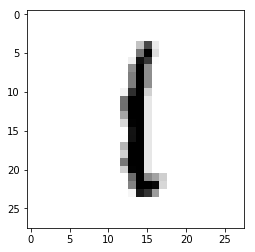

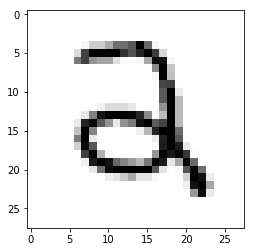

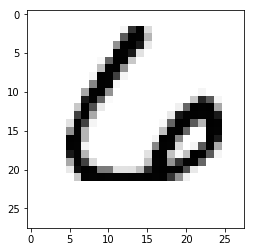

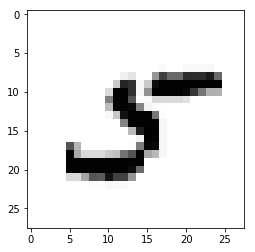

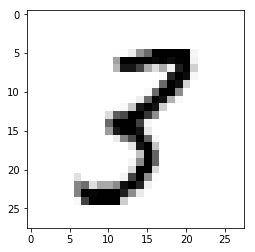

In [75]:
display_digits()

## Shuffle the dataset into train and test data

In [76]:
def split_data(dataset):
    random.shuffle(dataset)
    train_data = dataset[int(0.01*len(dataset)):]
    valid_data = dataset[int(0.99*len(dataset)):]
    return train_data, valid_data

In [77]:
train_data, valid_data= split_data(dataset)
print(len(train_data))
print(len(valid_data))

actual_labels= []
for line in valid_data:
    actual_labels.append(line[0])

19800
200


## Calculate Eculidean Distance

In [78]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(1,len(row1)-1):
        distance += (row1[i-1] - row2[i])**2
#     print (sqrt(distance))
    return sqrt(distance)

## Calculate Manhattan Distance

In [79]:
def manhattan_distance(row1, row2):
    distance = 0.0
    for i in range(1,len(row1)-1):
        distance += abs(row1[i] - row2[i])
#     print (distance)
    return distance

## Calculate 'k' nearest neighbours

In [80]:
def get_neighbors1(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
#         print (distances[i][0])
#     print (neighbors)  
    return neighbors

In [81]:
def get_neighbors2(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = manhattan_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
#         print (distances[i][0])
#     print (neighbors)  
    return neighbors

## Predict the class of test digit image vector

In [82]:
def predict_classification1(train, test_row, num_neighbors):
    neighbors = get_neighbors1(train, test_row, num_neighbors)
    output_values = [row[0] for row in neighbors]
#     print(output_values)
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [83]:
def predict_classification2(train, test_row, num_neighbors):
    neighbors = get_neighbors2(train, test_row, num_neighbors)
    output_values = [row[0] for row in neighbors]
#     print(output_values)
    prediction = max(set(output_values), key=output_values.count)
    return prediction

## Calculate Precision

In [84]:
def cal_precision(predicted_labels, actual_labels):
    prec= precision_score(actual_labels, predicted_labels, average=None)
    print ('Precision:', prec)
    print()
    return prec

## Calculate Recall

In [85]:
def cal_recall(predicted_labels, actual_labels):
    rec= recall_score(actual_labels, predicted_labels, average=None)
    print ('Recall:', rec)
    print()
    return rec

## Curve(Precision vs Recall)

In [86]:
def prec_vs_recall(prec, rec):
    plt.plot(rec, prec, label= "Precision vs Recall", linestyle='--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    print()

## Calculate Accuracy

In [87]:
def cal_accuracy(predicted_labels, actual_labels):
    acc= accuracy_score(actual_labels, predicted_labels)
    print ('Accuracy:', acc)
    print()
    return acc

## Calculate F1-Score

In [88]:
def cal_score(predicted_labels, actual_labels):
    print ('F1 score:', f1_score(actual_labels, predicted_labels, average=None))
    print()

## Classification Report

In [89]:
def class_report(predicted_labels, actual_labels):
    print ('Clasification report:', classification_report(actual_labels,predicted_labels))
    print()

## Confusion Matrix

In [90]:
def conf_matrix(predicted_labels, actual_labels):
    print ('Confussion matrix:',confusion_matrix(actual_labels, predicted_labels))
    print()

## Using Eculidean Distance

K= 3

Precision: [0.95833333 0.94444444 0.95238095 0.95652174 0.92307692 1.
 0.875      1.         0.94117647 0.95      ]

Recall: [0.92       0.89473684 0.95238095 0.95652174 1.         0.93333333
 0.93333333 0.91304348 1.         1.        ]



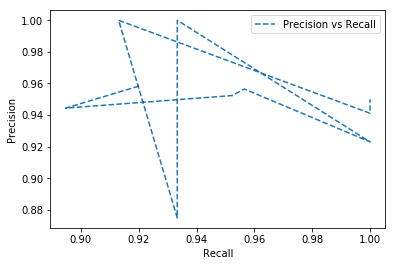


Accuracy: 0.95

F1 score: [0.93877551 0.91891892 0.95238095 0.95652174 0.96       0.96551724
 0.90322581 0.95454545 0.96969697 0.97435897]

Clasification report:              precision    recall  f1-score   support

          0       0.96      0.92      0.94        25
          1       0.94      0.89      0.92        19
          2       0.95      0.95      0.95        21
          3       0.96      0.96      0.96        23
          4       0.92      1.00      0.96        24
          5       1.00      0.93      0.97        15
          6       0.88      0.93      0.90        15
          7       1.00      0.91      0.95        23
          8       0.94      1.00      0.97        16
          9       0.95      1.00      0.97        19

avg / total       0.95      0.95      0.95       200


Confussion matrix: [[23  0  0  0  0  0  2  0  0  0]
 [ 0 17  0  0  2  0  0  0  0  0]
 [ 1  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  1  0]
 [ 0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  1

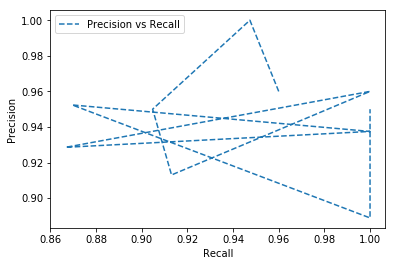


Accuracy: 0.945

F1 score: [0.96       0.97297297 0.92682927 0.91304348 0.97959184 0.89655172
 0.96774194 0.90909091 0.94117647 0.97435897]

Clasification report:              precision    recall  f1-score   support

          0       0.96      0.96      0.96        25
          1       1.00      0.95      0.97        19
          2       0.95      0.90      0.93        21
          3       0.91      0.91      0.91        23
          4       0.96      1.00      0.98        24
          5       0.93      0.87      0.90        15
          6       0.94      1.00      0.97        15
          7       0.95      0.87      0.91        23
          8       0.89      1.00      0.94        16
          9       0.95      1.00      0.97        19

avg / total       0.95      0.94      0.94       200


Confussion matrix: [[24  0  0  0  0  0  1  0  0  0]
 [ 0 18  0  0  1  0  0  0  0  0]
 [ 1  0 19  0  0  0  0  1  0  0]
 [ 0  0  0 21  0  1  0  0  1  0]
 [ 0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  

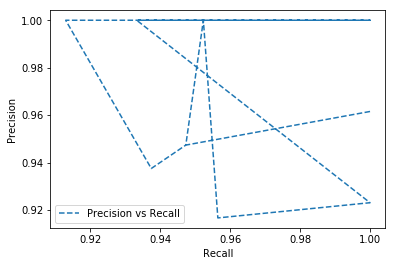


Accuracy: 0.96

F1 score: [0.98039216 0.94736842 0.97560976 0.93617021 0.96       0.96551724
 1.         0.95454545 0.9375     0.94736842]

Clasification report:              precision    recall  f1-score   support

          0       0.96      1.00      0.98        25
          1       0.95      0.95      0.95        19
          2       1.00      0.95      0.98        21
          3       0.92      0.96      0.94        23
          4       0.92      1.00      0.96        24
          5       1.00      0.93      0.97        15
          6       1.00      1.00      1.00        15
          7       1.00      0.91      0.95        23
          8       0.94      0.94      0.94        16
          9       0.95      0.95      0.95        19

avg / total       0.96      0.96      0.96       200


Confussion matrix: [[25  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  1  0  0  0  0  0]
 [ 1  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  1  0]
 [ 0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  1

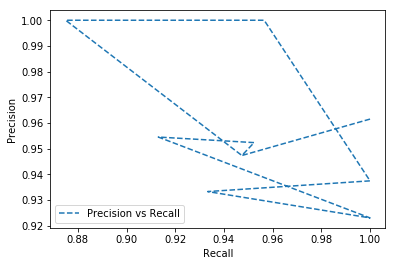


Accuracy: 0.955

F1 score: [0.98039216 0.94736842 0.95238095 0.93333333 0.96       0.93333333
 0.96774194 0.97777778 0.93333333 0.94736842]

Clasification report:              precision    recall  f1-score   support

          0       0.96      1.00      0.98        25
          1       0.95      0.95      0.95        19
          2       0.95      0.95      0.95        21
          3       0.95      0.91      0.93        23
          4       0.92      1.00      0.96        24
          5       0.93      0.93      0.93        15
          6       0.94      1.00      0.97        15
          7       1.00      0.96      0.98        23
          8       1.00      0.88      0.93        16
          9       0.95      0.95      0.95        19

avg / total       0.96      0.95      0.95       200


Confussion matrix: [[25  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  1  0  0  0  0  0]
 [ 1  0 20  0  0  0  0  0  0  0]
 [ 0  0  1 21  0  1  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  

In [91]:
kVals = range(3, 10, 2)
scratch_accuraciese=[]
for num_neighbors in range(3, 10, 2):
    print ("K=", num_neighbors)
    print()
    predicted_labels =[]


    for row in valid_data:
        label = predict_classification1(train_data, row, num_neighbors)
        predicted_labels.append(label)
    prec= cal_precision(predicted_labels, actual_labels)
    rec= cal_recall(predicted_labels, actual_labels)
    prec_vs_recall(prec, rec)
    scratch_accuraciese.append(cal_accuracy(predicted_labels, actual_labels))
    score= cal_score(predicted_labels, actual_labels)
    class_report(predicted_labels, actual_labels)
    conf_matrix(predicted_labels, actual_labels)
#     print("k=%d, accuracy=%.2f%%" % (num_neighbors, acc * 100))
    print("*****") 

In [92]:
print (scratch_accuraciese)

i = scratch_accuraciese.index(max(scratch_accuraciese))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % ((i*2) +3,
scratch_accuraciese[i] * 100))

[0.95, 0.945, 0.96, 0.955]
k=7 achieved highest accuracy of 96.00% on validation data


Testing Accuracies vs K using Eculidean Distance



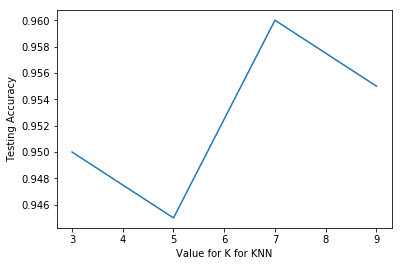

In [93]:
print ('Testing Accuracies vs K using Eculidean Distance')
print()
plt.plot(kVals, scratch_accuraciese)
plt.xlabel('Value for K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

## Using Manhattan Distance

K= 3

Precision: [0.96153846 1.         1.         0.91666667 1.         1.
 0.9375     1.         0.93333333 1.        ]

Recall: [1.         1.         0.95238095 0.95652174 1.         0.93333333
 1.         1.         0.875      1.        ]



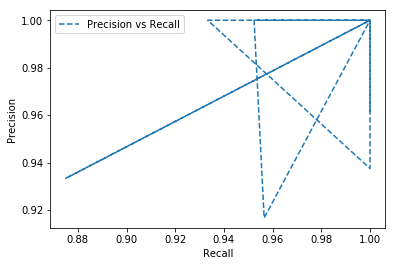


Accuracy: 0.975

F1 score: [0.98039216 1.         0.97560976 0.93617021 1.         0.96551724
 0.96774194 1.         0.90322581 1.        ]

Clasification report:              precision    recall  f1-score   support

          0       0.96      1.00      0.98        25
          1       1.00      1.00      1.00        19
          2       1.00      0.95      0.98        21
          3       0.92      0.96      0.94        23
          4       1.00      1.00      1.00        24
          5       1.00      0.93      0.97        15
          6       0.94      1.00      0.97        15
          7       1.00      1.00      1.00        23
          8       0.93      0.88      0.90        16
          9       1.00      1.00      1.00        19

avg / total       0.98      0.97      0.97       200


Confussion matrix: [[25  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 1  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  1  0]
 [ 0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  

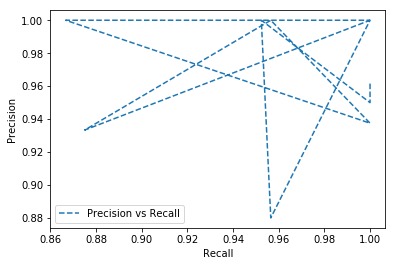


Accuracy: 0.965

F1 score: [0.98039216 0.97435897 0.97560976 0.91666667 1.         0.92857143
 0.96774194 0.97777778 0.90322581 1.        ]

Clasification report:              precision    recall  f1-score   support

          0       0.96      1.00      0.98        25
          1       0.95      1.00      0.97        19
          2       1.00      0.95      0.98        21
          3       0.88      0.96      0.92        23
          4       1.00      1.00      1.00        24
          5       1.00      0.87      0.93        15
          6       0.94      1.00      0.97        15
          7       1.00      0.96      0.98        23
          8       0.93      0.88      0.90        16
          9       1.00      1.00      1.00        19

avg / total       0.97      0.96      0.96       200


Confussion matrix: [[25  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 1  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  1  0]
 [ 0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  

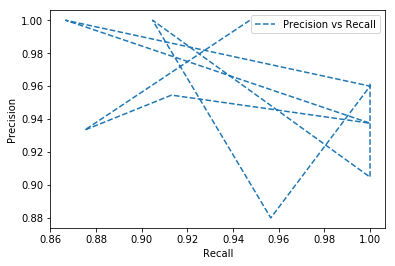


Accuracy: 0.95

F1 score: [0.98039216 0.95       0.95       0.91666667 0.97959184 0.92857143
 0.96774194 0.93333333 0.90322581 0.97297297]

Clasification report:              precision    recall  f1-score   support

          0       0.96      1.00      0.98        25
          1       0.90      1.00      0.95        19
          2       1.00      0.90      0.95        21
          3       0.88      0.96      0.92        23
          4       0.96      1.00      0.98        24
          5       1.00      0.87      0.93        15
          6       0.94      1.00      0.97        15
          7       0.95      0.91      0.93        23
          8       0.93      0.88      0.90        16
          9       1.00      0.95      0.97        19

avg / total       0.95      0.95      0.95       200


Confussion matrix: [[25  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 1  0 19  0  0  0  0  1  0  0]
 [ 0  0  0 22  0  0  0  0  1  0]
 [ 0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  2

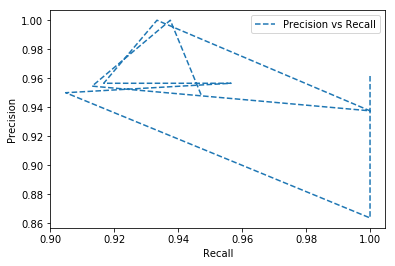


Accuracy: 0.95

F1 score: [0.98039216 0.92682927 0.92682927 0.95652174 0.93617021 0.96551724
 0.96774194 0.93333333 0.96774194 0.94736842]

Clasification report:              precision    recall  f1-score   support

          0       0.96      1.00      0.98        25
          1       0.86      1.00      0.93        19
          2       0.95      0.90      0.93        21
          3       0.96      0.96      0.96        23
          4       0.96      0.92      0.94        24
          5       1.00      0.93      0.97        15
          6       0.94      1.00      0.97        15
          7       0.95      0.91      0.93        23
          8       1.00      0.94      0.97        16
          9       0.95      0.95      0.95        19

avg / total       0.95      0.95      0.95       200


Confussion matrix: [[25  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 1  0 19  0  0  0  0  1  0  0]
 [ 0  0  1 22  0  0  0  0  0  0]
 [ 0  1  0  0 22  0  0  0  0  1]
 [ 0  0  0  1

In [94]:
# num_neighbors= 10
scratch_accuraciesm=[]
for num_neighbors in range(3, 10, 2):
    print ("K=", num_neighbors)
    print()
    predicted_labels =[]


    for row in valid_data:
        label = predict_classification2(train_data, row, num_neighbors)
        predicted_labels.append(label)
    prec= cal_precision(predicted_labels, actual_labels)
    rec= cal_recall(predicted_labels, actual_labels)
    prec_vs_recall(prec, rec)
    acc= cal_accuracy(predicted_labels, actual_labels)
    score= cal_score(predicted_labels, actual_labels)
    class_report(predicted_labels, actual_labels)
    conf_matrix(predicted_labels, actual_labels)
    scratch_accuraciesm.append(acc)
#     print("k=%d, accuracy=%.2f%%" % (num_neighbors, acc * 100))
    print("*****") 

In [95]:
i = np.argmax(scratch_accuraciesm)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % ((i*2) +3,
scratch_accuraciesm[i] * 100))

k=3 achieved highest accuracy of 97.50% on validation data


Testing Accuracies vs K using Manhattan Distance



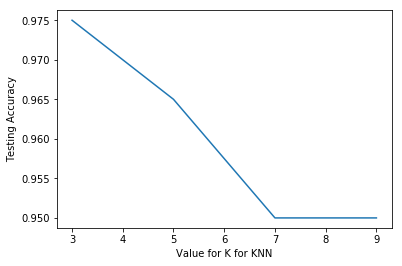

In [96]:
print ('Testing Accuracies vs K using Manhattan Distance')
print()
plt.plot(kVals, scratch_accuraciesm)
plt.xlabel('Value for K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

# Implementation of KNN by sckit-learn for Digit Recognition

In [97]:
import cv2
from sklearn import datasets
# from skimage import exposure
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [98]:
mnist = datasets.load_digits()

In [99]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.25, random_state=42)

In [100]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [101]:
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))


training data points: 1212
validation data points: 135
testing data points: 450


In [102]:
kVals = range(3, 10, 2)
accuracies = []

for k in range(3, 10, 2):
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
          

k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%


In [103]:
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))


k=3 achieved highest accuracy of 99.26% on validation data


In [104]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)

In [105]:
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

print ("Confusion matrix")
print(confusion_matrix(testLabels,predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.97      1.00      0.99        37
          2       1.00      1.00      1.00        38
          3       0.98      1.00      0.99        46
          4       0.98      1.00      0.99        55
          5       0.98      1.00      0.99        59
          6       1.00      1.00      1.00        45
          7       1.00      0.98      0.99        41
          8       0.97      0.97      0.97        38
          9       0.98      0.92      0.95        48

avg / total       0.99      0.99      0.99       450

Confusion matrix
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  1  1  1 

Testing Accuracies when built from scratch vs using Sckit Learn (Eculidean Distance



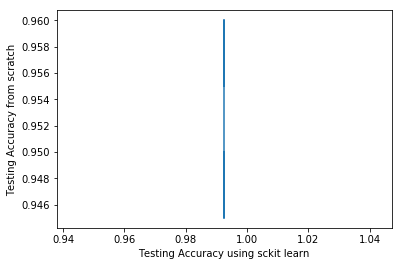

In [106]:
print ('Testing Accuracies when built from scratch vs using Sckit Learn (Eculidean Distance')
print()
plt.plot(accuracies, scratch_accuraciese)
plt.xlabel('Testing Accuracy using sckit learn')
plt.ylabel('Testing Accuracy from scratch')
plt.show()

Testing Accuracies when built from scratch vs using Sckit Learn (Manhattan Distance



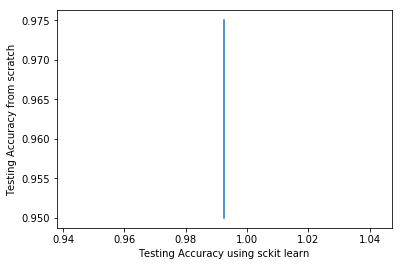

In [107]:
print ('Testing Accuracies when built from scratch vs using Sckit Learn (Manhattan Distance')
print()
plt.plot(accuracies, scratch_accuraciesm)
plt.xlabel('Testing Accuracy using sckit learn')
plt.ylabel('Testing Accuracy from scratch')
plt.show()